连接到odps

In [1]:
from utils.connect import connect

import os

from odps.df import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

o = connect()

查看ods层中的用户users数据详情

In [2]:
users = DataFrame(o.get_table('ods_github_users'))
users.dtypes

odps.Schema {
  login                     string        
  created_at                date          
  database_id               int64         
  location                  string        
  company                   string        
  bio                       string        
  is_employee               boolean       
  email                     string        
  infoname                  string        
  followers                 string        
  following                 string        
  time                      date          
  name                      string        
  lastupdatedat             date          
  nextupdateat              date          
}

In [3]:
users.count()

618242

In [4]:
users.head(5)

,login,created_at,database_id,location,company,bio,is_employee,email,infoname,followers,following,time,name,lastupdatedat,nextupdateat
0,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-11-22,LombiqBot,2022-01-25,2022-02-24
1,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-12-23,LombiqBot,2022-01-25,2022-02-24
2,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2022-01-25,LombiqBot,2022-01-25,2022-02-24
3,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-11-18,direwolf-github,2022-01-20,2022-02-19
4,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-12-20,direwolf-github,2022-01-20,2022-02-19


取出users表中的database_id，followers，following三列数据，分析用户follow的网络

In [5]:
users = users.to_pandas()
user_follow = users.loc[:,["database_id","followers","following"]]

In [6]:
len(user_follow)

618242

In [7]:
user_follow_d = user_follow.drop_duplicates()

去重后剩下37万行数据

In [8]:
len(user_follow_d)

373093

followers，following的数据是字符串类型，将其按逗号分割存在列表中，返回列表长度，即一个用户的followers或following的数量

In [9]:
list_followers_count = list(map(lambda x: len(x.split(",")) if x else 0, 
                                [i for i in user_follow_d["followers"]]))

对用户followers的数量做统计性描述

In [10]:
pd.Series(list_followers_count).describe()

count    373093.000000
mean         85.925059
std         732.244230
min           0.000000
25%           3.000000
50%          14.000000
75%          45.000000
max      148982.000000
dtype: float64

为了更直观的查看用户followers的数量分布，画图表示

In [11]:
dict_followers_count = {}
for i in list_followers_count:
    if i in dict_followers_count:
        dict_followers_count[i] += 1
    else:
        dict_followers_count[i] = 1
followers_num = np.array(list(dict_followers_count.keys())).reshape(-1,1)
followers_num_cnt = np.array(list(dict_followers_count.values())).reshape(-1,1)
followers = np.hstack([followers_num,followers_num_cnt])
followers = pd.DataFrame(followers)
followers = followers.sort_values(by=0)
followers

,0,1
2,0,41740
6,1,22485
7,2,17552
22,3,14709
1,4,12868
...,...,...
1059,75801,1
1060,76771,1
1061,77598,1
1944,146716,1


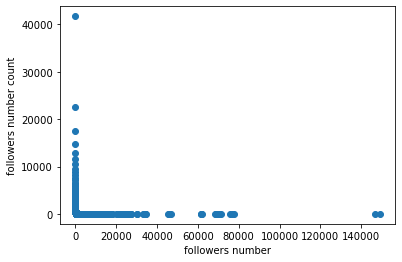

In [12]:
plt.scatter(followers[0], followers[1])
plt.xlabel("followers number")
plt.ylabel("followers number count")
plt.show()

由于数据太大，所以对数据取log10，看得清楚一些

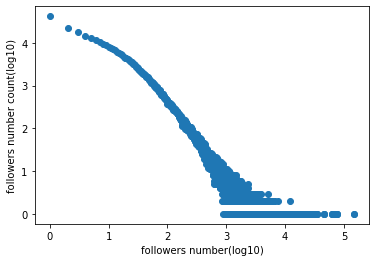

In [16]:
delta = 1
plt.scatter(np.log10(followers[0]+delta),np.log10(followers[1]))
plt.xlabel("followers number(log10)")
plt.ylabel("followers number count(log10)")
plt.savefig("./pictures/follow_numbers_cnt.png")
plt.show()

对following数据做和followers数据相同的操作

In [17]:
list_following_count = list(map(lambda x: len(x.split(",")) if x else 0, 
                                [i for i in user_follow_d["following"]]))

In [18]:
pd.Series(list_following_count).describe()

count    373093.000000
mean         44.894822
std         460.497530
min           0.000000
25%           1.000000
50%           7.000000
75%          26.000000
max       67221.000000
dtype: float64

In [19]:
dict_following_count = {}
for i in list_following_count:
    if i in dict_following_count:
        dict_following_count[i] += 1
    else:
        dict_following_count[i] = 1
        
following_num = np.array(list(dict_following_count.keys())).reshape(-1,1)
following_num_cnt = np.array(list(dict_following_count.values())).reshape(-1,1)
following = np.hstack([following_num,following_num_cnt])
following = pd.DataFrame(following)
following = following.sort_values(by=0)
following

,0,1
0,0,87336
3,1,28354
1,2,19450
7,3,15529
2,4,13231
...,...,...
1043,57146,1
1044,57150,1
1518,67010,1
1519,67012,1


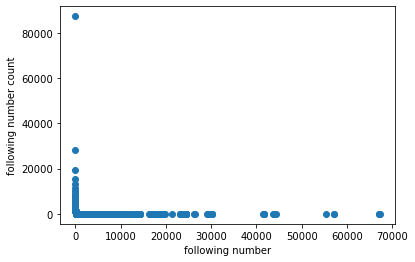

In [20]:
plt.scatter(following[0], following[1])
plt.xlabel("following number")
plt.ylabel("following number count")
plt.show()

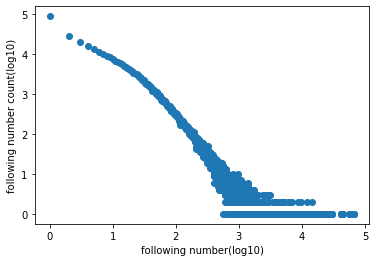

In [22]:
delta = 1
plt.scatter(np.log10(following[0]+delta),np.log10(following[1]))
plt.xlabel("following number(log10)")
plt.ylabel("following number count(log10)")
plt.savefig("./pictures/following_numbers_cnt.png")
plt.show()

分析网络的稀疏性

In [25]:
import networkx as nx

In [26]:
class UserGraph:
    def __init__(self, data):
        self.data = data
        self.vertex, self.edge = self.__to_graph__()
        
    def __to_graph__(self):
        vertex = []
        edge = []
        for database_id, followers, following in self.data.values:
            vertex.append(database_id)
            if followers:
                followers = followers.split(",")
                for follower in followers:
                    if follower not in vertex:
                        vertex.append(follower)
                    e = [follower, database_id]
                    if e not in edge:
                        edge.append(e)
            if following:
                following = following.split(",")
                for i in following:
                    if i not in vertex:
                        vertex.append(i)
                    e = [database_id, i]
                    if e not in edge:
                        edge.append(e)
        return vertex, edge

In [32]:
start = np.random.randint(0,len(user_follow_d) - 200)
user_graph = UserGraph(user_follow_d[start : start + 200])

In [33]:
len(user_graph.vertex)

3852

In [34]:
len(user_graph.edge)

4248

In [35]:
e_from = np.array(user_graph.edge)[:,0]
e_to = np.array(user_graph.edge)[:,1]
df = pd.DataFrame({ 'from':e_from, 'to':e_to }) 

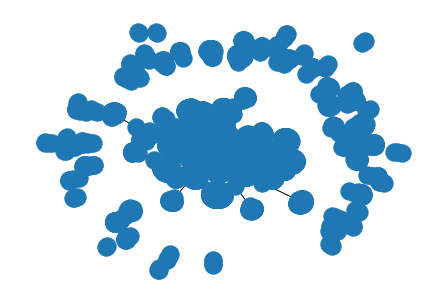

In [36]:
G=nx.from_pandas_edgelist(df, 'from', 'to') 
 
# nx.draw(G, with_labels=True)
nx.draw(G, with_labels=False)
plt.savefig("./pictures/follow_net.png")
plt.show()

查看ods层中的日志log数据详情

In [26]:
github_log = DataFrame(o.get_table('ods_github_log'))
github_log.dtypes

odps.Schema {
  id                                                                          string                  
  type                                                                        string                  
  action                                                                      string                  
  actor_id                                                                    int64                   
  actor_login                                                                 string                  
  repo_id                                                                     int64                   
  repo_name                                                                   string                  
  org_id                                                                      int64                   
  org_login                                                                   string                  
  created_at                                               

In [27]:
# github_log.count()

ODPS-0130071: InstanceId: 20220517053059263gg4rxh8a2       
ODPS-0130071:[0,0] Semantic analysis exception - physical plan generation failed: java.lang.RuntimeException: Table(OpenDigger_prod_dev,ods_github_log) is full scan with all partitions, please specify partition predicates.       
由于log表过大，不能扫描所有的分区，即不能用github_log.count()来获取所有log数据的数量，所以自己写了一个sql来获取每一年的log数据量  

In [38]:
def log_count(year):
    sql = "SELECT count(*) as cnt FROM ods_github_log WHERE pt>='%s0101' AND pt <='%s1201';" %(year, year)
    with o.execute_sql(sql).open_reader() as reader:
            for record in reader:
                return record.cnt

In [39]:
for i in range(2015, 2022):
    print(i, log_count(i))

2015 212221627
2016 320726236
2017 412942763
2018 479185525
2019 605544846
2020 863415598
2021 998564683


因为log数据太大，所以下载了2021年的数据，后续的分析计算都用这一年的数据    
因为一年的数据还是很大，所以分析的时候只用了第一季度，后面计算的时候因为会做过滤，所以还是会用一年的数据

先查看第一季度所有type的数据量，并排序输出    
因为直接输出会报错
Semantic analysis exception - ORDER BY must be used with a LIMIT clause, please set odps.sql.validate.orderby.limit=false to use it.
所以先确定了type的数量

In [40]:
sql = "SELECT count(*) as cnt FROM ods_github_log WHERE pt>='20210101' AND pt<='20210301';"
with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            print(record.cnt)

247778219


In [41]:
type_cnt = 0
sql = "SELECT DISTINCT type FROM ods_github_log WHERE pt='20210101';"
with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            print(record.type)
            type_cnt += 1

CommitCommentEvent
CreateEvent
DeleteEvent
ForkEvent
GollumEvent
IssueCommentEvent
IssuesEvent
MemberEvent
PublicEvent
PullRequestEvent
PullRequestReviewCommentEvent
PushEvent
ReleaseEvent
WatchEvent


In [42]:
sql = """SELECT type, count(*) as cnt FROM ods_github_log
WHERE pt>='20210101' AND pt<='20210301'
GROUP BY type ORDER BY cnt DESC LIMIT %s
""" %type_cnt
event_type = []
event_cnt = []
with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            print(record.type, record.cnt)
            event_type.append(record.type)
            event_cnt.append(int(record.cnt))

PushEvent 123441538
CreateEvent 38485579
PullRequestEvent 26278191
IssueCommentEvent 16340194
WatchEvent 13269952
DeleteEvent 9547182
IssuesEvent 6536574
ForkEvent 4783059
PullRequestReviewCommentEvent 4324718
ReleaseEvent 1247622
CommitCommentEvent 1019889
GollumEvent 965936
PublicEvent 793712
MemberEvent 744073


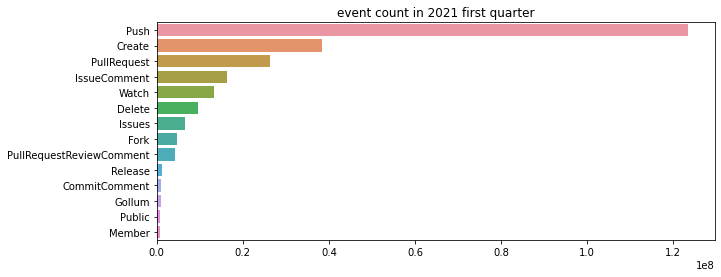

In [51]:
event_type = [i[0:-5] for i in event_type]
plt.figure(figsize=(10,4)) 
sns.barplot(x=event_cnt, y=event_type)
plt.title("event count in 2021 first quarter")
plt.savefig("./pictures/event.png")
plt.show()

In [2]:
sql = """SELECT actor_id, count(*) as cnt FROM ods_github_log
WHERE pt>='20210101' AND pt<='20210301'
GROUP BY actor_id
"""
actor_id = []
log_cnt = []
with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            actor_id.append(record.actor_id)
            log_cnt.append(record.cnt)

In [3]:
pd.Series(log_cnt).describe()

count    7.202365e+06
mean     3.440234e+01
std      8.266145e+03
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.991606e+07
dtype: float64

In [4]:
count = {}
for i in log_cnt:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1
num = np.array(list(count.keys())).reshape(-1,1)
num_cnt = np.array(list(count.values())).reshape(-1,1)

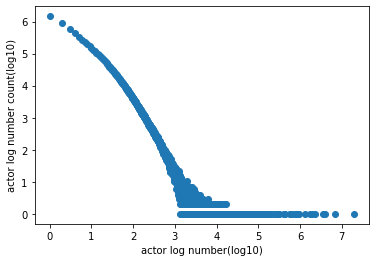

In [8]:
plt.scatter(np.log10(num),np.log10(num_cnt))
plt.xlabel("actor log number(log10)")
plt.ylabel("actor log number count(log10)")
plt.savefig("./pictures/log_number_count.png")
plt.show()

查看dim层的一些数据，dim_github_actor，dim_github_repo，dim_github_org，dim_github_issue，dim_github_pr

In [38]:
user_dim = DataFrame(o.get_table('dim_github_actor'))
user_dim.dtypes

odps.Schema {
  actor_id              int64           
  actor_login           string          
  type                  string          
  created_at            datetime        
}

In [39]:
user_dim.count()

39924151

In [40]:
user_dim.head(5)

,actor_id,actor_login,type,created_at
0,180,samgranieri,User,2021-12-16 13:52:50
1,217,tkersey,User,2021-12-17 08:27:04
2,588,nickpad,User,2021-07-02 19:28:29
3,813,Imbrondir,,NaT
4,903,luke0x,User,2015-05-28 21:43:58


In [44]:
repo_dim = DataFrame(o.get_table('dim_github_repo'))
repo_dim.dtypes

odps.Schema {
  repo_id                                   int64           
  repo_name                                 string          
  org_id                                    int64           
  org_login                                 string          
  repo_description                          string          
  repo_size                                 int32           
  repo_stargazers_count                     int32           
  repo_forks_count                          int32           
  repo_language                             string          
  repo_has_issues                           int8            
  repo_has_projects                         int8            
  repo_has_downloads                        int8            
  repo_has_wiki                             int8            
  repo_has_pages                            int8            
  repo_license                              string          
  repo_default_branch                       string          
  repo_cre

In [45]:
repo_dim.count()

220327295

In [46]:
repo_dim.head(5)

,repo_id,repo_name,org_id,org_login,repo_description,repo_size,repo_stargazers_count,repo_forks_count,repo_language,repo_has_issues,repo_has_projects,repo_has_downloads,repo_has_wiki,repo_has_pages,repo_license,repo_default_branch,repo_created_at,repo_updated_at,repo_pushed_at,repo_has_pr
0,20798,svenfuchs/reference_tracking,0,,,0,0,0,,0,0,0,0,0,,,None,None,None,0
1,22698,averyj/ramazon,0,,,0,0,0,,0,0,0,0,0,,,None,None,None,0
2,25247,kings/alonetone,0,,,0,0,0,,0,0,0,0,0,,,None,None,None,0
3,36812,takatoshiono/chin-ma-ya.org,0,,,0,0,0,,0,0,0,0,0,,,None,None,None,0
4,38382,dcrec1/in_place_editing_i18n,0,,,0,0,0,,0,0,0,0,0,,,None,None,None,0


In [47]:
org_dim = DataFrame(o.get_table('dim_github_org'))
org_dim.dtypes

odps.Schema {
  org_id              int64           
  org_login           string          
  created_at          datetime        
}

In [48]:
org_dim.count()

1866371

In [49]:
org_dim.head(5)

,org_id,org_login,created_at
0,1964,lincolnloop,2022-01-01 05:26:52
1,2842,wesabe,2021-09-24 00:50:10
2,7318,code,2019-01-05 06:10:11
3,10244,scotch,2021-05-10 04:36:10
4,11784,semantico,2019-08-26 19:13:27


In [54]:
issue_dim = DataFrame(o.get_table('dim_github_issue'))
issue_dim.dtypes

odps.Schema {
  issue_id                                        int64           
  issue_number                                    string          
  issue_title                                     string          
  issue_body                                      string          
  issue_labels_name                               string          
  issue_labels_color                              string          
  issue_labels_default                            string          
  issue_lables_description                        string          
  issue_comments                                  int16           
  issue_created_at                                datetime        
  issue_updated_at                                datetime        
  issue_closed_at                                 datetime        
}

In [55]:
issue_dim.count()

0

In [56]:
issue_dim.head(5)

,issue_id,issue_number,issue_title,issue_body,issue_labels_name,issue_labels_color,issue_labels_default,issue_lables_description,issue_comments,issue_created_at,issue_updated_at,issue_closed_at


In [32]:
pr_dim = DataFrame(o.get_table('dim_github_pr'))
pr_dim.dtypes

odps.Schema {
  pr_id                                           string      
  issue_number                                    string      
  issue_title                                     string      
  issue_body                                      string      
  issue_labels_name                               string      
  issue_labels_color                              string      
  issue_labels_default                            string      
  issue_labels_description                        string      
  issue_comments                                  string      
  issue_created_at                                string      
  issue_updated_at                                string      
  issue_closed_at                                 string      
  pull_commits                                    string      
  pull_additions                                  string      
  pull_deletions                                  string      
  pull_changed_files                     

In [33]:
pr_dim.count()

177141328

In [34]:
pr_dim.head(5)

,pr_id,issue_number,issue_title,issue_body,issue_labels_name,issue_labels_color,issue_labels_default,issue_labels_description,issue_comments,issue_created_at,issue_updated_at,issue_closed_at,pull_commits,pull_additions,pull_deletions,pull_changed_files,pull_merged,pull_merge_commit_sha,pull_merged_at,pull_review_comments
0,100001556,33,done,,[],[],[],[],0,2017-01-04 02:47:52,2017-01-04 02:47:52,1970-01-01 08:00:00,1,18,0,2,0,,,0
1,100007562,109,Remove nodeIDs by user action or after timeout,It is possible now to remove a nodeID (for ins...,"[""enhancement""]","[""84b6eb""]",[1],"[""""]",29,2017-01-04 03:31:13,2020-08-16 19:00:51,2020-08-16 19:00:51,11,91,2,2,0,,,1
2,100007893,1,Add osx env,,[],[],[],[],0,2017-01-04 03:33:33,2017-01-04 03:33:37,2017-01-04 03:33:37,2,201,0,2,1,36c72acb40e5a970b7919a03066dcc10c364f076,2017-01-04 03:33:37,0
3,100009393,2,Various tweaks,,[],[],[],[],0,2017-01-04 03:43:58,2017-01-04 05:25:33,2017-01-04 05:25:33,10,46,31,2,1,6eb9b06da38d359d36fc3b51e09438a907ac957c,2017-01-04 05:25:33,0
4,100010006,31,"Added ""Edit"" button when logged in as user and...","Added ""Edit"" button when logged in as user and...",[],[],[],[],0,2017-01-04 03:48:17,2017-01-04 03:48:42,2017-01-04 03:48:42,1,3,1,3,1,50fad027620cfff13cc6fd8be5725496d6c869db,2017-01-04 03:48:42,0
